In [4]:
import pandas as pd

df = pd.read_csv('aerofit_treadmill.csv')
df

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47
...,...,...,...,...,...,...,...,...,...
175,KP781,40,Male,21,Single,6,5,83416,200
176,KP781,42,Male,18,Single,5,4,89641,200
177,KP781,45,Male,16,Single,5,5,90886,160
178,KP781,47,Male,18,Partnered,4,5,104581,120


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


In [7]:
df.isnull().sum()/len(df)

Product          0.0
Age              0.0
Gender           0.0
Education        0.0
MaritalStatus    0.0
Usage            0.0
Fitness          0.0
Income           0.0
Miles            0.0
dtype: float64

<Axes: xlabel='Product', ylabel='Income'>

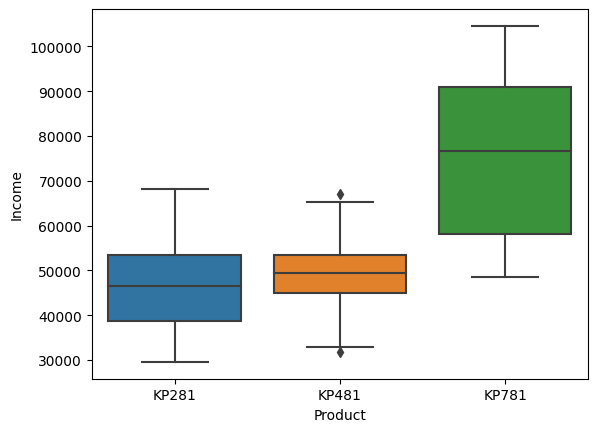

In [8]:
import seaborn as sbn
sbn.boxplot(x='Product', y='Income', data=df)

**People with higher income tend to buy the product KP781**

<Axes: xlabel='Product', ylabel='Income'>

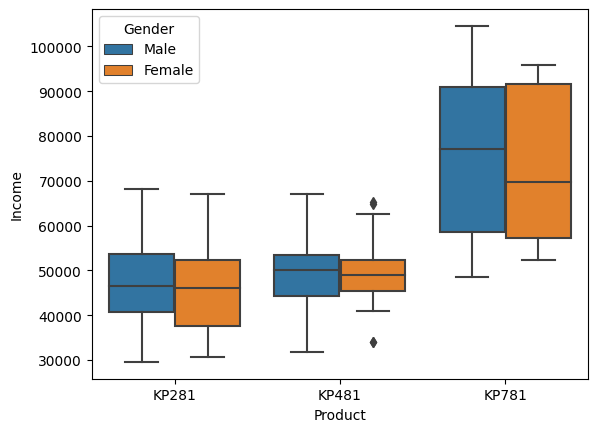

In [11]:
sbn.boxplot(x='Product', y='Income', hue='Gender', data=df)

**Irrespective of the gender, people with high income tend to buy the product KP781 as observed from the above plot**

In [14]:
df.groupby(['Gender', 'Product'])['Product'].count()

Gender  Product
Female  KP281      40
        KP481      29
        KP781       7
Male    KP281      40
        KP481      31
        KP781      33
Name: Product, dtype: int64

<Axes: xlabel='Product', ylabel='Miles'>

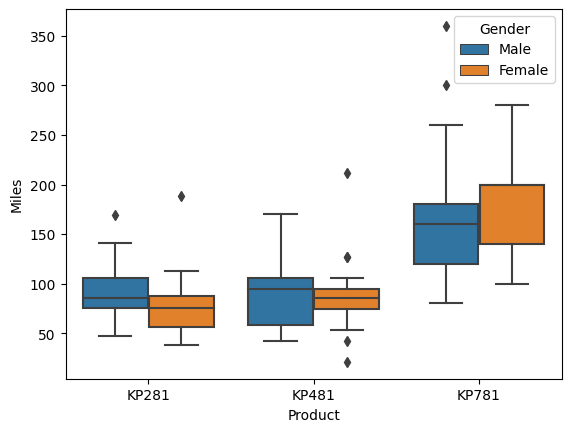

In [17]:
sbn.boxplot(x='Product', y='Miles',hue='Gender', data=df)

**People who run more miles buy the product KP781**

<Axes: xlabel='Education', ylabel='count'>

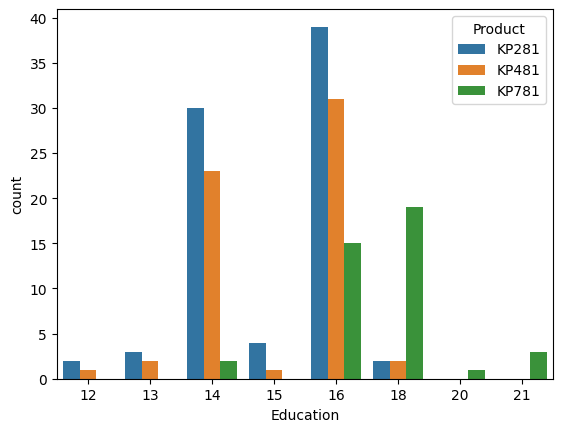

In [19]:
sbn.countplot(x='Education', hue='Product', data=df)

**People with more eductaion buy the product KP781**

<ipython-input-21-6af517ecf5a3>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sbn.heatmap(df.corr(),annot=True)


<Axes: >

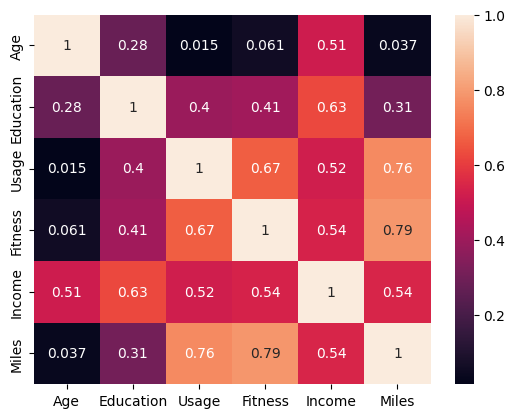

In [21]:
sbn.heatmap(df.corr(),annot=True)

**Education and Income has the highest co-relation**

In [23]:
df.corr()

<ipython-input-23-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Age,Education,Usage,Fitness,Income,Miles
Age,1.000000,0.280496,0.015064,0.061105,0.513414,0.036618
Education,0.280496,1.000000,0.395155,0.410581,0.625827,0.307284
Usage,0.015064,0.395155,1.000000,0.668606,0.519537,0.759130
Fitness,0.061105,0.410581,0.668606,1.000000,0.535005,0.785702
Income,0.513414,0.625827,0.519537,0.535005,1.000000,0.543473
Miles,0.036618,0.307284,0.759130,0.785702,0.543473,1.000000


In [25]:
df.groupby(['Gender','Product'])['Product'].count().unstack()

Product,KP281,KP481,KP781
Gender,,,
Female,40,29,7
Male,40,31,33


In [26]:
pd.crosstab(index=df['Gender'], columns=df['Product'], margins=True)

Product,KP281,KP481,KP781,All
Gender,,,,
Female,40,29,7,76
Male,40,31,33,104
All,80,60,40,180


Marginal Probability

P(Female) -76/180

P(Male) - 104/180

In [28]:
pd.crosstab(index=df['Gender'], columns=df['Product'], margins=True,normalize=True)*100

Product,KP281,KP481,KP781,All
Gender,,,,
Female,22.222222,16.111111,3.888889,42.222222
Male,22.222222,17.222222,18.333333,57.777778
All,44.444444,33.333333,22.222222,100.000000


P(KP281) - 44%

P(KP481) - 33%

P(KP781) - 22%



In [29]:
pd.crosstab(index=df['Gender'], columns=df['Product'], margins=True)

Product,KP281,KP481,KP781,All
Gender,,,,
Female,40,29,7,76
Male,40,31,33,104
All,80,60,40,180


In [30]:
pd.crosstab(index=df['Gender'], columns=df['Product'], margins=True, normalize='index')*100

Product,KP281,KP481,KP781
Gender,,,
Female,52.631579,38.157895,9.210526
Male,38.461538,29.807692,31.730769
All,44.444444,33.333333,22.222222


Out of 100 females 52 are buying KP281

In [32]:
pd.crosstab(index=df['Gender'], columns=df['Product'], margins=True, normalize='columns')*100

Product,KP281,KP481,KP781,All
Gender,,,,
Female,50.0,48.333333,17.5,42.222222
Male,50.0,51.666667,82.5,57.777778


<Axes: xlabel='Product', ylabel='Income'>

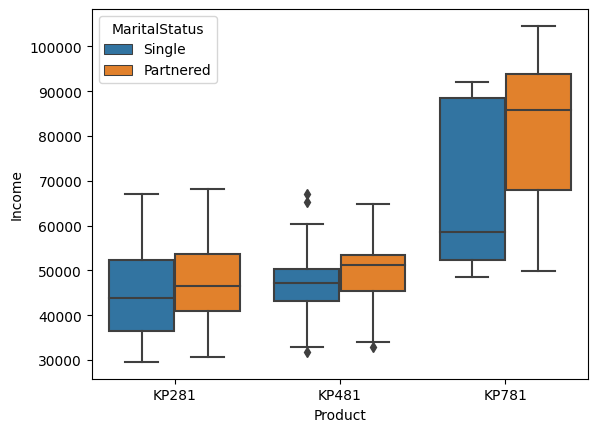

In [34]:
sbn.boxplot(x='Product', y='Income', hue='MaritalStatus', data=df)

**Partenered people buy more of KP781**

In [36]:
df.groupby(['MaritalStatus', 'Product'])['Product'].count()

MaritalStatus  Product
Partnered      KP281      48
               KP481      36
               KP781      23
Single         KP281      32
               KP481      24
               KP781      17
Name: Product, dtype: int64

In [37]:
df.groupby(['MaritalStatus','Product'])['Product'].count().unstack()

Product,KP281,KP481,KP781
MaritalStatus,,,
Partnered,48,36,23
Single,32,24,17


In [38]:
pd.crosstab(index=df['MaritalStatus'], columns=df['Product'], margins=True)

Product,KP281,KP481,KP781,All
MaritalStatus,,,,
Partnered,48,36,23,107
Single,32,24,17,73
All,80,60,40,180


In [39]:
pd.crosstab(index=df['MaritalStatus'], columns=df['Product'], margins=True,normalize=True)*100

Product,KP281,KP481,KP781,All
MaritalStatus,,,,
Partnered,26.666667,20.000000,12.777778,59.444444
Single,17.777778,13.333333,9.444444,40.555556
All,44.444444,33.333333,22.222222,100.000000
